# MUM 2023-24 Prosty ciągły model generatywny

## Najprostszy model generatywny - rozkład ciągły

1. jednowymiarowy rozkład normalny
2. dane treningowe
$$\{x_n\}$$
    * $x_n\in\mathbb{R}$
    * "wektory" jednowymiarowe
3. parametry
    * $\mu$ - średnia rozkładu
    * $\sigma^2$ - wariancja
    * $\theta = (\mu, \sigma)$
4. likelihood to gęstość rozkładu $\mathcal{N}(\mu, \sigma^2)$
$$p(x\mid\theta) = p(x\mid\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$
5. log likelihood pojedynczego przykładu to
$$-\ln(\sqrt{2\pi}) - \ln(\sigma) - \frac{(x-\mu)^2}{2\sigma^2}$$
    * dlatego warto w gęstości mieć funkcję wykładniczą - przyjemny wzór!
6. negative mean log likelihood to
$$\begin{align}\dfrac{1}{N}\sum_{n=1}^N [ \ln(\sqrt{2\pi}) + \ln(\sigma) + \frac{(x_n-\mu)^2}{2\sigma^2} ] &= \ln(\sqrt{2\pi}) + \ln(\sigma) + \dfrac{1}{N}\sum_{n=1}^N \frac{(x_n-\mu)^2}{2\sigma^2} \\ &= const + \ln(\sigma) + \dfrac{1}{N}\sum_{n=1}^N \frac{(x_n-\mu)^2}{2\sigma^2}\end{align}$$
7. parametr $\sigma$
    * musi być dodatni
    * krok optimizera może przenieść na drugą stronę zera
    * weźmy: $\sigma = e^\tau$, wtedy $\tau$ jest dowolną liczbą rzeczywistą
$$ L(\mu, \tau) = const + \tau + \dfrac{1}{N}\sum_{n=1}^N \frac{(x_n-\mu)^2}{2e^{2\tau}} $$

8. gradient
$$\begin{align} \dfrac{\partial L}{\partial\mu}(\mu, \tau) &= e^{-2\tau}(\mu - \dfrac{1}{N}\sum_{n=1}^N x_n) \\
\dfrac{\partial L}{\partial\tau}(\mu, \tau) &= 1 - e^{-2\tau}\dfrac{1}{N}\sum_{n=1}^N (x_n-\mu)^2\end{align}$$

9. przyrównując obie pochodne cząstkowe do zera można wprost obliczyć minimum
    * wynik
$$\begin{align}\widehat\mu &= \dfrac{1}{N}\sum_{n=1}^N x_n \\
\widehat{\sigma^2} &= \dfrac{1}{N}\sum_{n=1}^N (x_n-\widehat\mu)^2\end{align}$$
    * model estymuje parametry na podstawie zbioru treningowego
        * estymator wartości oczekiwanej
        * obciążony estymator wariancji
          * wartość średnia estymowanego parametru (wariancji) nie jest równa wartości parametru
    * formalnie trzeba udowodnić więcej o $L$, aby stwierdzić, że to jest minimum globalne
        * nie będziemy tego robić
        * to faktycznie jest minimum globalne

In [1]:
%matplotlib notebook
from src.najprostszy_model_generatywny import draw
import numpy as np

In [2]:
# TAKI OPTIMIZER TEŻ DZIAŁA
class SignumGradientDescent:
    def __init__(self, initial_theta, learning_rate):
        self.mu, self.tau = initial_theta
        self.learning_rate = learning_rate
    def get_params(self):
        return np.array([self.mu, self.tau])
    def step(self, gradients):
        self.mu -= self.learning_rate * np.sign(gradients[0])
        self.tau -= self.learning_rate * np.sign(gradients[1])

# FUNKCJA KOSZTU
def L(X, mu, tau):
    return np.mean(np.square(X-mu))*np.exp(-2*tau)/2 + tau

# GRADIENT
def grad_L(X, mu, tau):
    return np.array([
        np.exp(-2*tau)*(mu-np.mean(X)),
        1 - np.exp(-2*tau)*np.mean(np.square(X-mu))
    ])

# PRAWDZIWE THETA
mu_true = 4.
tau_true = 0.3

# GENERUJEMY LOSOWO ZBIÓR TRENINGOWY
X = np.random.RandomState(seed=43).normal(
        loc=mu_true,
        scale=np.exp(tau_true),
        size=(437,)
)

# OPTIMIZER
opt = SignumGradientDescent(
    initial_theta=(0., 0.),
    learning_rate=.01,
)

# HISTORIA TRENOWANIA, PRZYDA SIĘ DO RYSOWANIA WYKRESÓW
history = []

# PĘTLA UCZENIA
for _ in range(437):
    mu, tau = opt.get_params()
    l = L(X, mu, tau)
    grad = grad_L(X, mu, tau)
    opt.step(grad)
    history.append([l, mu, tau])

<IPython.core.display.Javascript object>


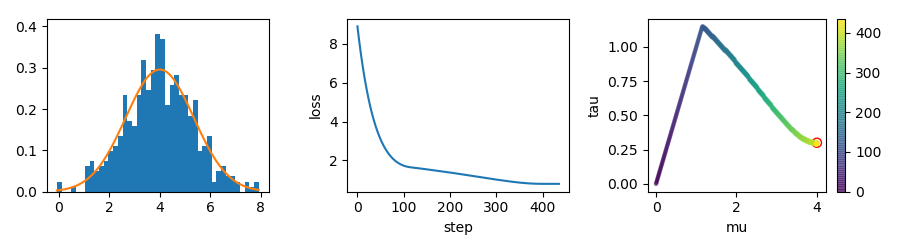

In [3]:
# ANIMACJA HISTORII UCZENIA
draw(X, mu_true, tau_true, np.array(history).T)